In [20]:
# ライブラリのインポート
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns

In [4]:
# 販売実績データを読み込む
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape)
print(test.shape)

(207, 12)
(40, 11)


In [8]:
# データの情報を確認する
print(train.info())
print(test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       207 non-null    object 
 1   y              207 non-null    int64  
 2   week           207 non-null    object 
 3   soldout        207 non-null    int64  
 4   name           207 non-null    object 
 5   kcal           166 non-null    float64
 6   remarks        21 non-null     object 
 7   event          14 non-null     object 
 8   payday         10 non-null     float64
 9   weather        207 non-null    object 
 10  precipitation  207 non-null    object 
 11  temperature    207 non-null    float64
dtypes: float64(3), int64(2), object(7)
memory usage: 19.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       

In [5]:
# 欠損値の確認
print(train.isnull())
print(test.isnull())

     datetime      y   week  soldout   name   kcal  remarks  event  payday  \
0       False  False  False    False  False   True     True   True    True   
1       False  False  False    False  False   True     True   True    True   
2       False  False  False    False  False   True     True   True    True   
3       False  False  False    False  False   True     True   True    True   
4       False  False  False    False  False   True     True   True    True   
..        ...    ...    ...      ...    ...    ...      ...    ...     ...   
202     False  False  False    False  False  False     True   True    True   
203     False  False  False    False  False  False     True   True    True   
204     False  False  False    False  False   True    False  False    True   
205     False  False  False    False  False  False     True   True    True   
206     False  False  False    False  False  False     True   True    True   

     weather  precipitation  temperature  
0      False        

In [6]:
# 欠損値の数を確認する
print(train.isnull().sum())
print(test.isnull().sum())

datetime           0
y                  0
week               0
soldout            0
name               0
kcal              41
remarks          186
event            193
payday           197
weather            0
precipitation      0
temperature        0
dtype: int64
datetime          0
week              0
soldout           0
name              0
kcal              4
remarks          33
event            37
payday           38
weather           0
precipitation     0
temperature       0
dtype: int64


In [7]:
# 欠損値のあるカラムに入っているデータを確認する
print(train['remarks'].value_counts())
print(train['name'].value_counts())
print(train['event'].value_counts())
print(train['payday'].value_counts())

お楽しみメニュー                    12
料理長のこだわりメニュー                 5
鶏のレモンペッパー焼（50食）、カレー（42食）     1
酢豚（28食）、カレー（85食）             1
手作りの味                        1
スペシャルメニュー（800円）              1
Name: remarks, dtype: int64
メンチカツ            6
タンドリーチキン         6
手作りロースカツ         5
鶏の唐揚げおろしソース      4
回鍋肉              4
                ..
白身魚唐揚げ野菜あんかけ     1
ポークハヤシ           1
酢豚orカレー          1
ハンバーグ和風きのこソース    1
鶏肉とカシューナッツ炒め     1
Name: name, Length: 156, dtype: int64
ママの会             9
キャリアアップ支援セミナー    5
Name: event, dtype: int64
1.0    10
Name: payday, dtype: int64


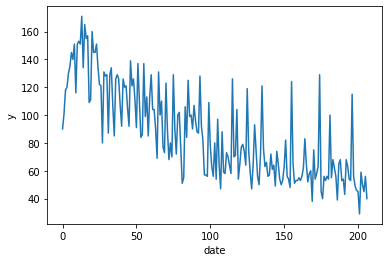

In [10]:
#販売数の折れ線グラフを作る
train['y'].plot()
plt.xlabel('date')
plt.ylabel('y')
plt.show()

In [12]:
#完売データを抽出する
train_soldout = train[train['soldout'] == True]
print(train_soldout.shape)
train_soldout.head()

(93, 12)


,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1
5,2013-11-25,135,月,1,鶏の唐揚,NaN,NaN,NaN,NaN,曇,--,14.6
7,2013-11-27,140,水,1,ボローニャ風カツ,NaN,NaN,NaN,NaN,晴れ,--,14.7


In [15]:
train_soldout['weather'].value_counts()

快晴    23
曇     22
晴れ    21
雨     18
薄曇     7
雪      1
雷電     1
Name: weather, dtype: int64

In [18]:
train.describe(include='O')

,datetime,week,name,remarks,event,weather,precipitation
count,207,207,207,21,14,207,207
unique,207,5,156,6,2,7,8
top,2013-11-18,水,メンチカツ,お楽しみメニュー,ママの会,快晴,--
freq,1,43,6,12,9,53,169


In [19]:
train_soldout.describe(include='O')

,datetime,week,name,remarks,event,weather,precipitation
count,93,93,93,7,6,93,93
unique,93,5,79,4,2,7,7
top,2013-11-19,水,タンドリーチキン,料理長のこだわりメニュー,ママの会,快晴,--
freq,1,24,5,3,4,23,68


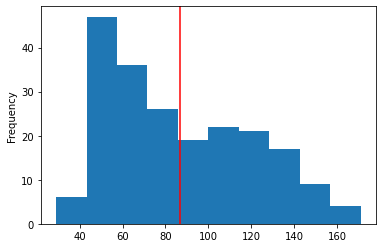

In [22]:
#ヒストグラム
train['y'].plot.hist()
plt.axvline(x=train["y"].mean(), color="red")
plt.show()

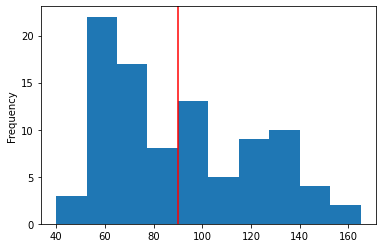

In [24]:
#ヒストグラム
train_soldout['y'].plot.hist()
plt.axvline(x=train_soldout["y"].mean(), color="red")
plt.show()

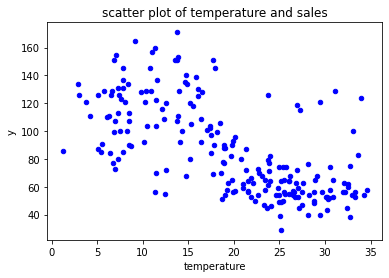

In [25]:
#気温と売り上げの散布図
train.plot.scatter( x='temperature', y='y', c="blue", title="scatter plot of temperature and sales" )
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='temperature'>

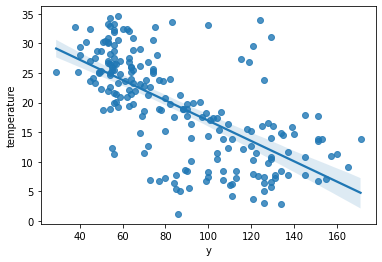

In [26]:
sns.regplot('y','temperature',data=train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='kcal'>

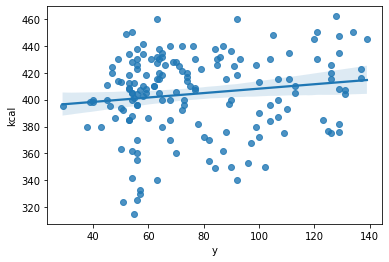

In [27]:
sns.regplot('y','kcal',data=train)

In [28]:
train[['y','temperature','kcal']].corr()

,y,temperature,kcal
y,1.000000,-0.655332,0.147269
temperature,-0.655332,1.000000,-0.046191
kcal,0.147269,-0.046191,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 28779 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 27700 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 37329 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 26376 missing from c

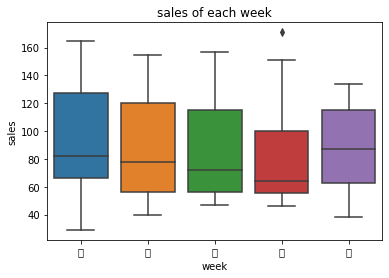

In [31]:
# 箱ひげ図の描画（表示順序をorderで指定している）
sns.boxplot( x='week', y='y', data=train )

# y軸にラベルを付けます
plt.title("sales of each week")
plt.ylabel("sales")

# グラフの表示
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 28779 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 27700 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 37329 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 26376 missing from c

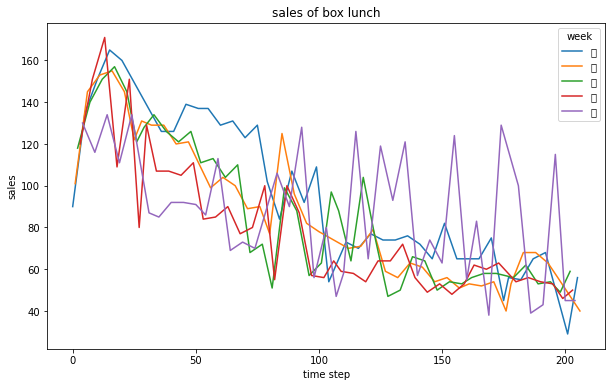

In [32]:
# グラフのサイズを指定して、折れ線グラフの描画
plt.figure(figsize=(10,6))
sns.lineplot( x=train.index, y='y', hue='week', data=train )

# x軸・y軸にラベルを付けます
plt.xlabel("time step")
plt.ylabel("sales")
# タイトルを付けます
plt.title("sales of box lunch")

# グラフの表示
plt.show()

In [36]:
# 欠損値の補正
kcal_mean = train['kcal'].mean()
print(kcal_mean)
train['kcal'].fillna(kcal_mean,inplace=True)
train['remarks'].fillna('特記事項なし',inplace=True)
train['event'].fillna('イベントなし',inplace=True)
train['payday'].fillna(0,inplace=True)

train.isnull().sum()

404.4096385542169


datetime         0
y                0
week             0
soldout          0
name             0
kcal             0
remarks          0
event            0
payday           0
weather          0
precipitation    0
temperature      0
dtype: int64

特記事項なし                      186
お楽しみメニュー                     12
料理長のこだわりメニュー                  5
鶏のレモンペッパー焼（50食）、カレー（42食）      1
酢豚（28食）、カレー（85食）              1
手作りの味                         1
スペシャルメニュー（800円）               1
Name: remarks, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 29305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 35352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20107 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 38917 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12394 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12375 missing from c

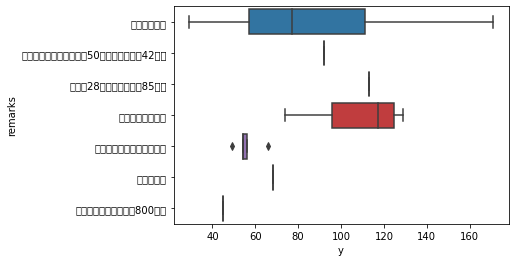

In [38]:
# remarksと販売数の相関
# 箱ひげ図
print(train['remarks'].value_counts())
sns.boxplot(x='y', y='remarks', data=train)
plt.show()

イベントなし           193
ママの会               9
キャリアアップ支援セミナー      5
Name: event, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12505 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12531 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12394 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12375 missing from c

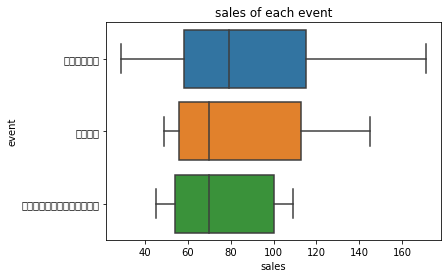

In [40]:
# eventと販売数の相関を調べる
print(train['event'].value_counts())
# 箱ひげ図
sns.boxplot(x='y', y='event', data=train)

# x軸にラベルを付けて表示
plt.title("sales of each event")
plt.xlabel("sales")
plt.show()

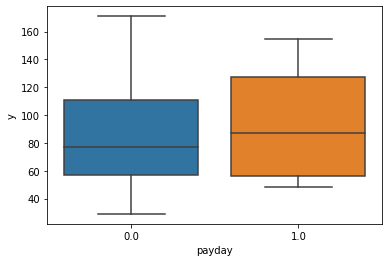

In [41]:
# 箱ひげ図
sns.boxplot(x='payday', y='y', data=train)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24555 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12428 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26311 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 34180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 38632 missing from c

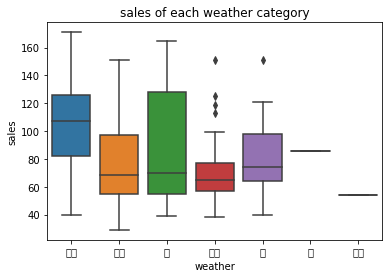

In [42]:
# 箱ひげ図（表示の順番をorderで指定しています）
sns.boxplot(x='weather', y='y', data=train, order=["快晴","晴れ","曇","薄曇","雨","雪","雷電"])

# y軸にラベルを付けて表示
plt.title("sales of each weather category")
plt.ylabel("sales")
plt.show()